# Forecasting_Model_based_methods

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
ps = pd.read_csv("E:\\ASSIGNMENT FROM EXCELR\\Forecasting\\PlasticSales.csv")
ps

,Month,Sales
0,Jan-49,742
1,Feb-49,697
2,Mar-49,776
3,Apr-49,898
4,May-49,1030
5,Jun-49,1107
6,Jul-49,1165
7,Aug-49,1216
8,Sep-49,1208
9,Oct-49,1131


<AxesSubplot:>

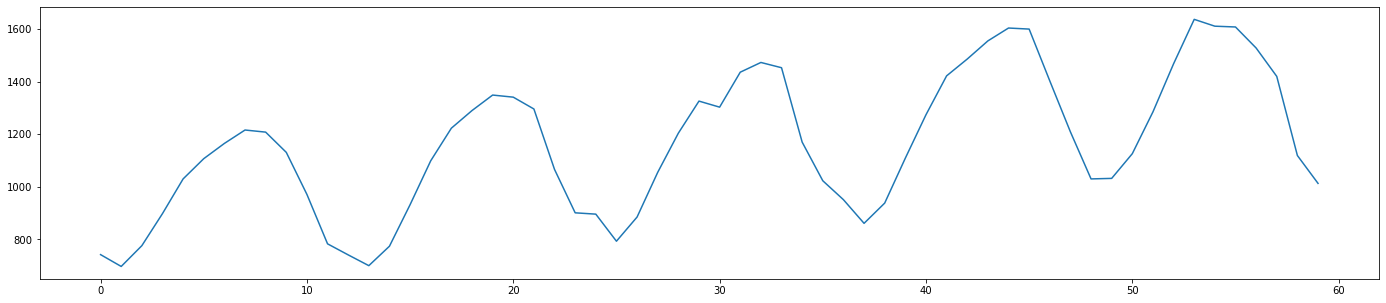

In [4]:
plt.figure(figsize=(24,5))
ps.Sales.plot()


In [5]:
ps["Date"] = pd.to_datetime(ps.Month,format="%b-%y")
#look for c standard format codes

# Extracting Day, weekday name, month name, year from the Date column using 
# Date functions from pandas 

ps["month"] = ps.Date.dt.strftime("%b") # month extraction
ps["year"] = ps.Date.dt.strftime("%y") # year extraction

#ps["Day"] = ps.Date.dt.strftime("%d") # Day extraction
#ps["wkday"] = ps.Date.dt.strftime("%A") # weekday extraction


<AxesSubplot:xlabel='month', ylabel='year'>

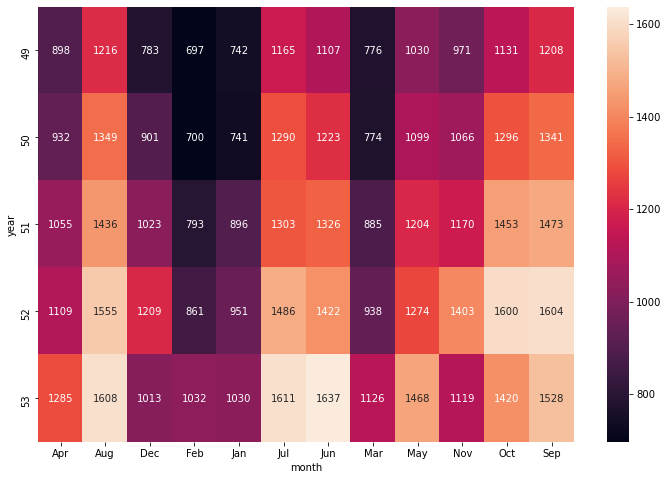

In [6]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=ps,values="Sales",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

<AxesSubplot:xlabel='year', ylabel='Sales'>

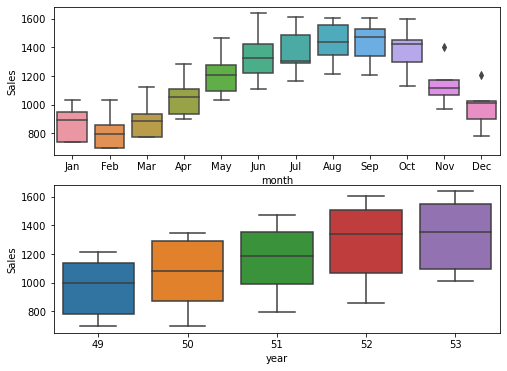

In [7]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Sales",data=ps)
plt.subplot(212)
sns.boxplot(x="year",y="Sales",data=ps)


<ipython-input-8-4d49b654c6fd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ps['months'][i]= p[0:3]
E:\Anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


<AxesSubplot:>

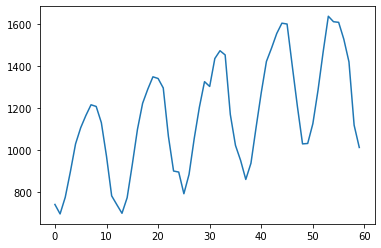

In [8]:
month =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 
#import numpy as np
p = ps["Month"][0]
p[0:3]
ps['months']= 0

for i in range(60):
    p = ps["Month"][i]
    ps['months'][i]= p[0:3]
    
month_dummies = pd.DataFrame(pd.get_dummies(ps['months']))
ps1 = pd.concat([ps.Sales,month_dummies],axis = 1)

ps1["t"] = np.arange(1,61)

ps1["t_square"] = ps1["t"]*ps1["t"]
ps1.columns
ps1["log_Sales"] = np.log(ps1["Sales"])
ps1.rename(columns={"Sales ": 'Sales'}, inplace=True)
ps1.Sales.plot()

In [9]:
ps1

,Sales,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Sales
0,742,0,0,0,0,1,0,0,0,0,0,0,0,1,1,6.609349
1,697,0,0,0,1,0,0,0,0,0,0,0,0,2,4,6.546785
2,776,0,0,0,0,0,0,0,1,0,0,0,0,3,9,6.654153
3,898,1,0,0,0,0,0,0,0,0,0,0,0,4,16,6.800170
4,1030,0,0,0,0,0,0,0,0,1,0,0,0,5,25,6.937314
5,1107,0,0,0,0,0,0,1,0,0,0,0,0,6,36,7.009409
6,1165,0,0,0,0,0,1,0,0,0,0,0,0,7,49,7.060476
7,1216,0,1,0,0,0,0,0,0,0,0,0,0,8,64,7.103322
8,1208,0,0,0,0,0,0,0,0,0,0,0,1,9,81,7.096721
9,1131,0,0,0,0,0,0,0,0,0,0,1,0,10,100,7.030857


<AxesSubplot:xlabel='year', ylabel='Sales'>

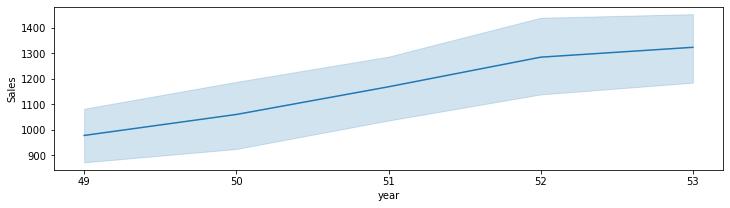

In [10]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Sales",data=ps)

In [11]:
#Splitting data¶

Train = ps1.head(35)
Test = ps1.iloc[35:48,:]
predict_data = ps1.tail(12)

In [12]:

ps2= ps1.iloc[0:48,:]


In [13]:
Train

,Sales,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Sales
0,742,0,0,0,0,1,0,0,0,0,0,0,0,1,1,6.609349
1,697,0,0,0,1,0,0,0,0,0,0,0,0,2,4,6.546785
2,776,0,0,0,0,0,0,0,1,0,0,0,0,3,9,6.654153
3,898,1,0,0,0,0,0,0,0,0,0,0,0,4,16,6.800170
4,1030,0,0,0,0,0,0,0,0,1,0,0,0,5,25,6.937314
5,1107,0,0,0,0,0,0,1,0,0,0,0,0,6,36,7.009409
6,1165,0,0,0,0,0,1,0,0,0,0,0,0,7,49,7.060476
7,1216,0,1,0,0,0,0,0,0,0,0,0,0,8,64,7.103322
8,1208,0,0,0,0,0,0,0,0,0,0,0,1,9,81,7.096721
9,1131,0,0,0,0,0,0,0,0,0,0,1,0,10,100,7.030857


In [14]:
Test

,Sales,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Sales
35,1023,0,0,1,0,0,0,0,0,0,0,0,0,36,1296,6.930495
36,951,0,0,0,0,1,0,0,0,0,0,0,0,37,1369,6.857514
37,861,0,0,0,1,0,0,0,0,0,0,0,0,38,1444,6.758095
38,938,0,0,0,0,0,0,0,1,0,0,0,0,39,1521,6.843750
39,1109,1,0,0,0,0,0,0,0,0,0,0,0,40,1600,7.011214
40,1274,0,0,0,0,0,0,0,0,1,0,0,0,41,1681,7.149917
41,1422,0,0,0,0,0,0,1,0,0,0,0,0,42,1764,7.259820
42,1486,0,0,0,0,0,1,0,0,0,0,0,0,43,1849,7.303843
43,1555,0,1,0,0,0,0,0,0,0,0,0,0,44,1936,7.349231
44,1604,0,0,0,0,0,0,0,0,0,0,0,1,45,2025,7.380256


In [16]:
predict_data

,Sales,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Sales
48,1030,0,0,0,0,1,0,0,0,0,0,0,0,49,2401,6.937314
49,1032,0,0,0,1,0,0,0,0,0,0,0,0,50,2500,6.939254
50,1126,0,0,0,0,0,0,0,1,0,0,0,0,51,2601,7.026427
51,1285,1,0,0,0,0,0,0,0,0,0,0,0,52,2704,7.158514
52,1468,0,0,0,0,0,0,0,0,1,0,0,0,53,2809,7.291656
53,1637,0,0,0,0,0,0,1,0,0,0,0,0,54,2916,7.400621
54,1611,0,0,0,0,0,1,0,0,0,0,0,0,55,3025,7.384610
55,1608,0,1,0,0,0,0,0,0,0,0,0,0,56,3136,7.382746
56,1528,0,0,0,0,0,0,0,0,0,0,0,1,57,3249,7.331715
57,1420,0,0,0,0,0,0,0,0,0,0,1,0,58,3364,7.258412


In [17]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear


245.2308942032014

In [18]:
#Exponential

Exp = smf.ols('log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp


244.3724819905783

In [19]:
#Quadratic 

Quad = smf.ols('Sales~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

284.15045418897034

In [20]:
#Additive seasonality 

add_sea = smf.ols('Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

230.9734324456526

In [21]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Sales~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad


79.61181069132884

In [22]:
#Multiplicative Seasonality

Mul_sea = smf.ols('log_Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

233.87759313888031

In [23]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_Sales~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

68.96094327773004

In [24]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,68.960943
4,rmse_add_sea_quad,79.611811
3,rmse_add_sea,230.973432
5,rmse_Mult_sea,233.877593
1,rmse_Exp,244.372482
0,rmse_linear,245.230894
2,rmse_Quad,284.150454


In [25]:
predict_data

,Sales,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Sales
48,1030,0,0,0,0,1,0,0,0,0,0,0,0,49,2401,6.937314
49,1032,0,0,0,1,0,0,0,0,0,0,0,0,50,2500,6.939254
50,1126,0,0,0,0,0,0,0,1,0,0,0,0,51,2601,7.026427
51,1285,1,0,0,0,0,0,0,0,0,0,0,0,52,2704,7.158514
52,1468,0,0,0,0,0,0,0,0,1,0,0,0,53,2809,7.291656
53,1637,0,0,0,0,0,0,1,0,0,0,0,0,54,2916,7.400621
54,1611,0,0,0,0,0,1,0,0,0,0,0,0,55,3025,7.384610
55,1608,0,1,0,0,0,0,0,0,0,0,0,0,56,3136,7.382746
56,1528,0,0,0,0,0,0,0,0,0,0,0,1,57,3249,7.331715
57,1420,0,0,0,0,0,0,0,0,0,0,1,0,58,3364,7.258412


In [26]:
#Build the model on entire data set
model_full = smf.ols('log_Sales~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=ps2).fit()

In [27]:
pred_new  = pd.Series(Mul_Add_sea.predict(predict_data))
pred_new

48    6.929166
49    6.848632
50    6.954507
51    7.123669
52    7.268361
53    7.360200
54    7.389169
55    7.450755
56    7.455052
57    7.417163
58    7.228987
59    7.033622
dtype: float64

In [28]:
predict_data["forecasted_Sales"] = pd.DataFrame(pred_new)


<ipython-input-28-33d50a554571>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data["forecasted_Sales"] = pd.DataFrame(pred_new)


In [29]:
predict_data

,Sales,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Sales,forecasted_Sales
48,1030,0,0,0,0,1,0,0,0,0,0,0,0,49,2401,6.937314,6.929166
49,1032,0,0,0,1,0,0,0,0,0,0,0,0,50,2500,6.939254,6.848632
50,1126,0,0,0,0,0,0,0,1,0,0,0,0,51,2601,7.026427,6.954507
51,1285,1,0,0,0,0,0,0,0,0,0,0,0,52,2704,7.158514,7.123669
52,1468,0,0,0,0,0,0,0,0,1,0,0,0,53,2809,7.291656,7.268361
53,1637,0,0,0,0,0,0,1,0,0,0,0,0,54,2916,7.400621,7.360200
54,1611,0,0,0,0,0,1,0,0,0,0,0,0,55,3025,7.384610,7.389169
55,1608,0,1,0,0,0,0,0,0,0,0,0,0,56,3136,7.382746,7.450755
56,1528,0,0,0,0,0,0,0,0,0,0,0,1,57,3249,7.331715,7.455052
57,1420,0,0,0,0,0,0,0,0,0,0,1,0,58,3364,7.258412,7.417163


# Forecasting_Model_Arima

In [30]:
# Import libraries
from pandas import read_csv
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [31]:
series = read_csv('E:\\ASSIGNMENT FROM EXCELR\\Forecasting\\PlasticSales.csv', header=0, index_col=0, parse_dates=True)


In [32]:
series

,Sales
Month,
2049-01-01,742
2049-02-01,697
2049-03-01,776
2049-04-01,898
2049-05-01,1030
2049-06-01,1107
2049-07-01,1165
2049-08-01,1216
2049-09-01,1208


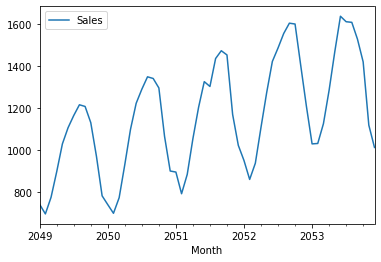

In [33]:

# line plot of time series
from pandas import read_csv
from matplotlib import pyplot
series.plot()
pyplot.show()


array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

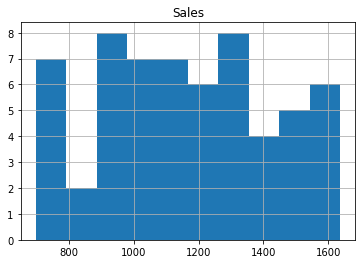

In [34]:
series.hist()

<AxesSubplot:ylabel='Density'>

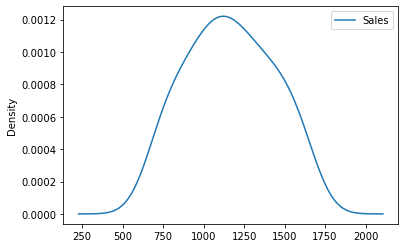

In [35]:
series.plot(kind='kde')

In [42]:
series.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2049-01-01 to 2053-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   60 non-null     int64
dtypes: int64(1)
memory usage: 960.0 bytes


In [43]:
# separate out a validation dataset
dataset = series.head(50)
validation = series.tail(10)
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)


Dataset 50, Validation 10


In [44]:
#Persistence/ Base model

# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]


In [45]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)


>Predicted=896.000, Expected=793.000
>Predicted=793.000, Expected=885.000
>Predicted=885.000, Expected=1055.000
>Predicted=1055.000, Expected=1204.000
>Predicted=1204.000, Expected=1326.000
>Predicted=1326.000, Expected=1303.000
>Predicted=1303.000, Expected=1436.000
>Predicted=1436.000, Expected=1473.000
>Predicted=1473.000, Expected=1453.000
>Predicted=1453.000, Expected=1170.000
>Predicted=1170.000, Expected=1023.000
>Predicted=1023.000, Expected=951.000
>Predicted=951.000, Expected=861.000
>Predicted=861.000, Expected=938.000
>Predicted=938.000, Expected=1109.000
>Predicted=1109.000, Expected=1274.000
>Predicted=1274.000, Expected=1422.000
>Predicted=1422.000, Expected=1486.000
>Predicted=1486.000, Expected=1555.000
>Predicted=1555.000, Expected=1604.000
>Predicted=1604.000, Expected=1600.000
>Predicted=1600.000, Expected=1403.000
>Predicted=1403.000, Expected=1209.000
>Predicted=1209.000, Expected=1030.000
>Predicted=1030.000, Expected=1032.000
RMSE: 130.244


In [46]:
#ARIMA Hyperparameters

# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
#def evaluate_arima_model(X, arima_order):
# prepare training dataset
#    X = X.astype('float32')
 #   train_size = int(len(X) * 0.50)
  #  train, test = X[0:train_size], X[train_size:]
   # history = [x for x in train]
# make predictions
    #predictions = list()
    #for t in range(len(test)):
     #   model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
      #  model_fit = model.fit(disp=0)
       # yhat = model_fit.forecast()[0]
        #predictions.append(yhat)
       # history.append(test[t])
# calculate out of sample error
   # rmse = sqrt(mean_squared_error(test, predictions))
    #return rmse


In [47]:
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
model=ARIMA(train,order=(3,0,2)).fit(disp=0)
pred=model.forecast(steps=35)[0]
pred

rmse_arima = sqrt(mean_squared_error(test, predictions))
rmse_arima



E:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
E:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:728: RuntimeWarning: divide by zero encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
E:\Anaconda\li

LinAlgError: SVD did not converge

In [48]:
#Grid search for p,d,q values

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [49]:
# load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(1, 5)
d_values = range(0,1)
q_values = range(1, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

Best ARIMANone RMSE=inf


In [50]:
#Build Model based on the optimized values

# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy


In [51]:
# load data
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

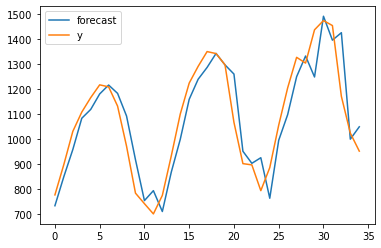

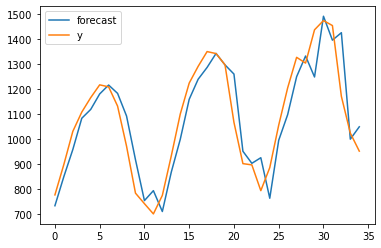

In [52]:
# fit model
model = ARIMA(X, order=(1,0,1))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1, 35)

In [53]:
#Error on the test data
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

370.16112695184063

In [54]:
#Combine train and test data and build final model

# fit model
data = pd.read_csv("E:\\ASSIGNMENT FROM EXCELR\\Forecasting\\PlasticSales.csv",header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [55]:
model = ARIMA(X, order=(1,0,1))
model_fit = model.fit()

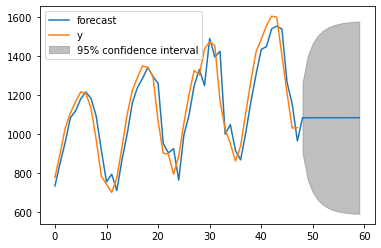

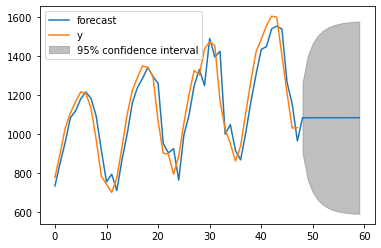

In [56]:
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1,60)


In [57]:
pd.DataFrame(forecast)

,0
0,1082.804188
1,1082.859394
2,1082.904999
3,1082.942672
4,1082.973793
5,1082.999501
6,1083.020739
7,1083.038283
8,1083.052775
9,1083.064747


# Forecasting_Data_Driven_Models

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [59]:
ps = pd.read_csv("E:\\ASSIGNMENT FROM EXCELR\\Forecasting\\PlasticSales.csv")
ps

,Month,Sales
0,Jan-49,742
1,Feb-49,697
2,Mar-49,776
3,Apr-49,898
4,May-49,1030
5,Jun-49,1107
6,Jul-49,1165
7,Aug-49,1216
8,Sep-49,1208
9,Oct-49,1131


<AxesSubplot:>

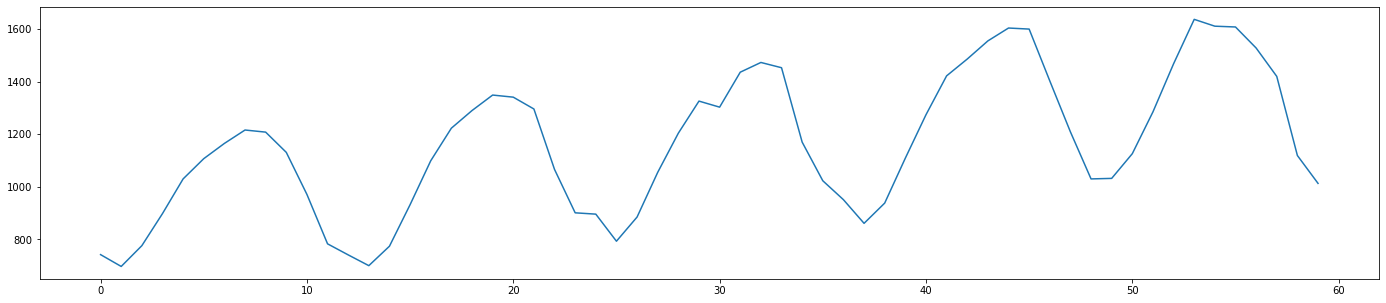

In [60]:
plt.figure(figsize=(24,5))
ps.Sales.plot()

In [61]:
#Splitting data¶

Train = ps.head(48)
Test = ps.tail(12)

In [62]:
Train

,Month,Sales
0,Jan-49,742
1,Feb-49,697
2,Mar-49,776
3,Apr-49,898
4,May-49,1030
5,Jun-49,1107
6,Jul-49,1165
7,Aug-49,1216
8,Sep-49,1208
9,Oct-49,1131


In [63]:
Test

,Month,Sales
48,Jan-53,1030
49,Feb-53,1032
50,Mar-53,1126
51,Apr-53,1285
52,May-53,1468
53,Jun-53,1637
54,Jul-53,1611
55,Aug-53,1608
56,Sep-53,1528
57,Oct-53,1420


In [64]:
predict_data

,Sales,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Sales,forecasted_Sales
48,1030,0,0,0,0,1,0,0,0,0,0,0,0,49,2401,6.937314,6.929166
49,1032,0,0,0,1,0,0,0,0,0,0,0,0,50,2500,6.939254,6.848632
50,1126,0,0,0,0,0,0,0,1,0,0,0,0,51,2601,7.026427,6.954507
51,1285,1,0,0,0,0,0,0,0,0,0,0,0,52,2704,7.158514,7.123669
52,1468,0,0,0,0,0,0,0,0,1,0,0,0,53,2809,7.291656,7.268361
53,1637,0,0,0,0,0,0,1,0,0,0,0,0,54,2916,7.400621,7.360200
54,1611,0,0,0,0,0,1,0,0,0,0,0,0,55,3025,7.384610,7.389169
55,1608,0,1,0,0,0,0,0,0,0,0,0,0,56,3136,7.382746,7.450755
56,1528,0,0,0,0,0,0,0,0,0,0,0,1,57,3249,7.331715,7.455052
57,1420,0,0,0,0,0,0,0,0,0,0,1,0,58,3364,7.258412,7.417163


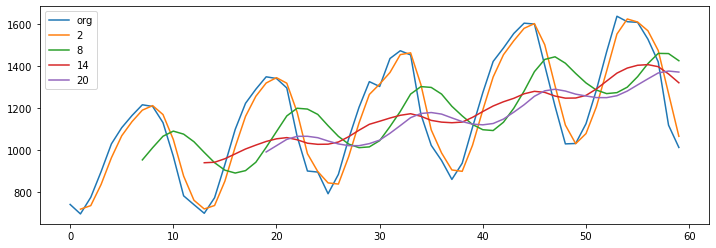

In [65]:
#Moving Average

plt.figure(figsize=(12,4))
ps.Sales.plot(label="org")
for i in range(2,24,6):
    ps["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

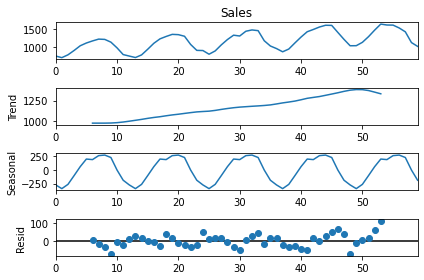

In [66]:
#Time series decomposition plot¶

decompose_ts_add = seasonal_decompose(ps.Sales,freq=12)
decompose_ts_add.plot()
plt.show()

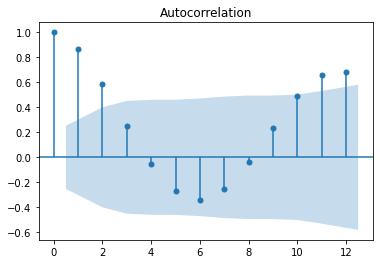

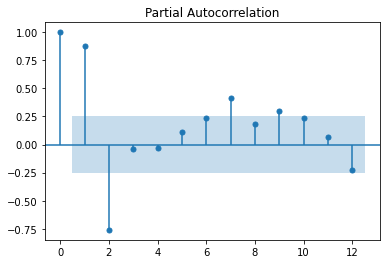

In [67]:
#ACF plots and PACF plots

import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(ps.Sales,lags=12)
tsa_plots.plot_pacf(ps.Sales,lags=12)
plt.show()

In [68]:
#Evaluation Metric MAPE

def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [69]:
#Simple Exponential Method¶

ses_model = SimpleExpSmoothing(Train.Sales).fit(smoothing_level=0.5)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales)

17.893990255560407

In [70]:
# Holt method 
hw_model = Holt(Train.Sales).fit(smoothing_level=0.5, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales)

18.48529089659206

In [71]:
#Holts winter exponential smoothing with multiplicative seasonality and additive trend

hwe_model_mul_add = ExponentialSmoothing(Train.Sales,seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

80.43560562335387

In [72]:
#Final Model by combining train and test

hwe_model_add_add = ExponentialSmoothing(ps.Sales,seasonal="add",trend="add",seasonal_periods=4).fit()

In [73]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

60    857.809814
61    764.315670
62    543.949089
63    396.043346
64    261.819382
65    168.325238
66    -52.041343
67   -199.947087
68   -334.171050
69   -427.665195
dtype: float64